In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns; sns.set_theme(color_codes=True)
import seaborn as sns
import missingno as msno

In [2]:
%%time
dtype = {
    'userID': 'int16',
    'answerCode': 'int8',
    'KnowledgeTag': 'int16'
}   

# 데이터 경로 맞춰주세요!
DATA_PATH = '/opt/ml/input/data/train_dataset/train_data.csv'
df = pd.read_csv(DATA_PATH, dtype=dtype, parse_dates=['Timestamp'])
df = df.sort_values(by=['userID', 'Timestamp']).reset_index(drop=True)

CPU times: user 4.11 s, sys: 412 ms, total: 4.52 s
Wall time: 4.53 s


In [3]:
df

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


### 한 user가 차지하는 row 수
- 모델에서 seq_len 결정할 수 있다

In [4]:
user_list = df.userID.tolist()

In [5]:
from collections import defaultdict
user_count = defaultdict(int)
for u in user_list:
    user_count[u] += 1

In [6]:
user_count_df = pd.DataFrame(user_count.items(), columns=["userID", "count"])
user_count_df.head()

,userID,count
0,0,745
1,1,933
2,2,276
3,5,833
4,6,921


In [8]:
len(user_count_df)

6698

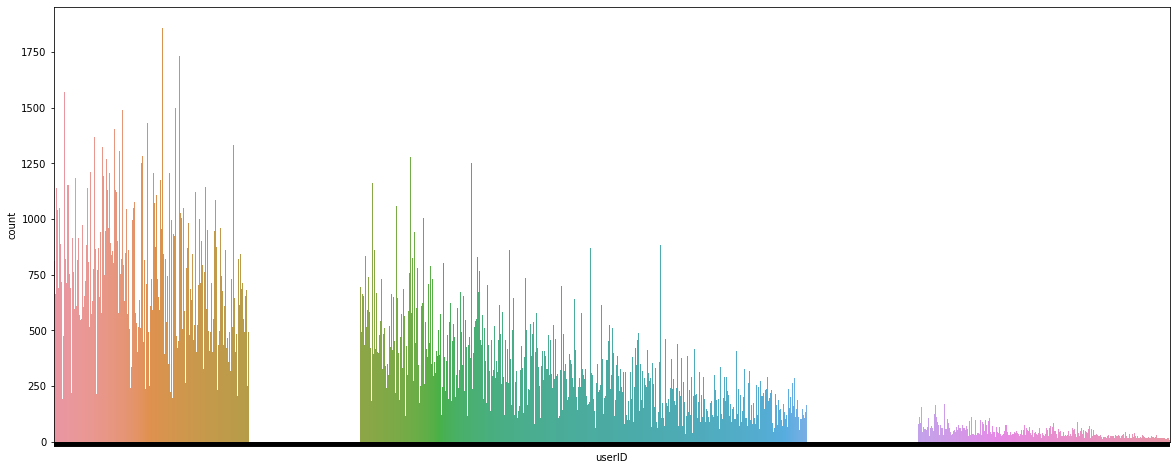

In [32]:
plt.figure(figsize=(20, 8))

plot = sns.barplot(data=user_count_df, x="userID", y="count")
plot.set(xticklabels=[])
plt.show()
# plot.set(xlabel=None)

In [26]:
user_count_values = np.array(list(user_count.values()))
user_count_values
user_count_values.min(), user_count_values.max(), user_count_values.mean(), np.median(user_count_values)

(9, 1860, 338.39743206927443, 231.5)